In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fuzzywuzzy import process
import spacy

# First 1000 words analysis

In [7]:
df = pd.read_csv('../data/Words.csv', sep = ';', index_col = 0, parse_dates = True )

### Clean

In [12]:
df.sort_index(inplace=True)

In [13]:
df.shape[0]

1007

### Add months

In [14]:
df['month'] =df.index.to_period('M')

In [15]:
bday = pd.to_datetime('19 October 2019')

In [16]:
df['Leo_months'] = ((df.index - bday)/np.timedelta64(1, 'M'))

In [17]:
df['Leo_months'] = df['Leo_months'].astype(int)

In [18]:
df.groupby(['Leo_months'])['word'].count().cumsum()

Leo_months
9        1
11       3
12       6
13      17
14      25
15      43
16      68
17      97
18     184
19     300
20     419
21     519
22     623
23     724
24     842
25     924
26    1007
Name: word, dtype: int64

#### Translation

In [27]:
df.loc[df['language'] == 'spanish'].to_csv('words_spa.csv')

In [29]:
df.loc[df['language'] == 'german'].to_csv('words_ger.csv')

In [21]:
import translators as ts

Using Germany server backend.


#### test

In [28]:
ts.google('Abuela', from_language='es', to_language='en')

'Grandmother'

In [30]:
def translate_to_en(word, language):
    if language == 'spanish':
        translation = ts.google(word, from_language='es', to_language='en')
    elif language == 'german':
        translation = ts.google(word, from_language='de', to_language='en')
    else:
        translation = word
    return translation
    

In [33]:
df.head().apply(lambda x: translate_to_en(x['word'], x['language']), axis=1)

date
2020-08-07           Mama
2020-09-24          Water
2020-10-07    Grandmother
2020-10-31           Moon
2020-11-05         banana
dtype: object

In [34]:
df['en_word'] = df.apply(lambda x: translate_to_en(x['word'], x['language']), axis=1)

In [36]:
df.to_csv('words_with_translation.csv')

In [46]:
df.head(15)

,word,language,month,Leo_months,en_word
date,,,,,
2020-08-07,Mama,neutral,2020-08,9,Mama
2020-09-24,agua,spanish,2020-09,11,Water
2020-10-07,Abuela,spanish,2020-10,11,Grandmother
2020-10-31,luna,spanish,2020-10,12,Moon
2020-11-05,Banane,german,2020-11,12,banana
2020-11-15,Pepe,neutral,2020-11,12,Pepe
2020-11-18,Ball,german,2020-11,13,ball
2020-11-22,más,spanish,2020-11,13,plus
2020-11-23,no,spanish,2020-11,13,No


## Vocabulary increase

<Figure size 720x432 with 0 Axes>

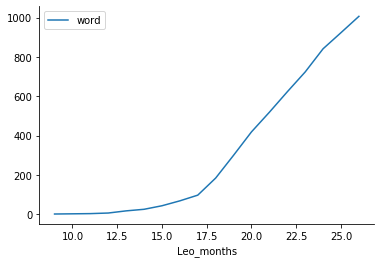

In [19]:
plt.figure(figsize = (10,6))
df.groupby(['Leo_months'])['word'].count().cumsum().to_frame().plot()
sns.despine()

In [21]:
df_months = df.groupby(['Leo_months'])['word'].count().cumsum().to_frame().reset_index()
df_months.head(10)

,Leo_months,word
0,9,1
1,11,3
2,12,6
3,13,17
4,14,25
5,15,43
6,16,68
7,17,97
8,18,184
9,19,300


#### `PLOT FOR TALK:` Vocabulary increase

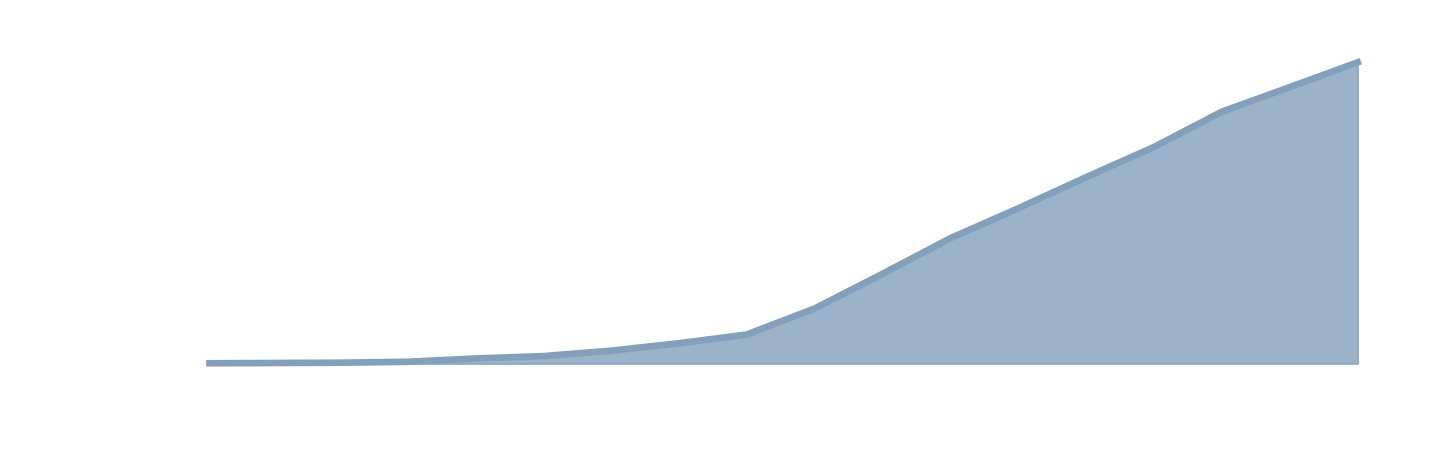

In [22]:
plt.figure(figsize=(12, 4), dpi=120)
ax = plt.gca()
sns.lineplot(data = df_months, x = 'Leo_months', y = 'word', color = '#82A0BC', linewidth = 4)
#sns.scatterplot(data = df_months, x = 'Leo_months', y = 'word', color = '#82A0BC', s = 100)

#plt.title(r"Vocabulary increase", size = 28, color = 'white', loc = 'left')
#ax.set_title(r"Total vocabulary increase", size = 28, color = 'white', loc = 'left', y=1.2, pad=-14)
plt.xlabel(r"Kid's months", size = 18)
plt.ylabel('# of words',rotation=0, size = 18)
plt.xlim([9,27])
ax.yaxis.set_label_coords(-0.09,1.02)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.tick_params(axis='x', colors='white', width=2)
ax.tick_params(axis='y', colors='white', width=2)
#plt.hlines(50, 0, 15.5, linestyle='--', color = 'white')
#plt.hlines(100, 0, 17, linestyle='--', color = 'white')
plt.fill_between(df_months.Leo_months.values, df_months.word.values, color = '#82A0BC', alpha = 0.8)
sns.despine()
plt.tight_layout()
#plt.savefig('../images/words_filled_wide.png', transparent=True)

### Separate in languages

In [62]:
df_months_spa = df.loc[df['language'] == 'spanish',:].groupby(['Leo_months'])['word'].count().cumsum().to_frame().reset_index()

In [63]:
df_months_ger = df.loc[df['language'] == 'german',:].groupby(['Leo_months'])['word'].count().cumsum().to_frame().reset_index()

#### `PLOT FOR TALK:` Vocabulary increase per language

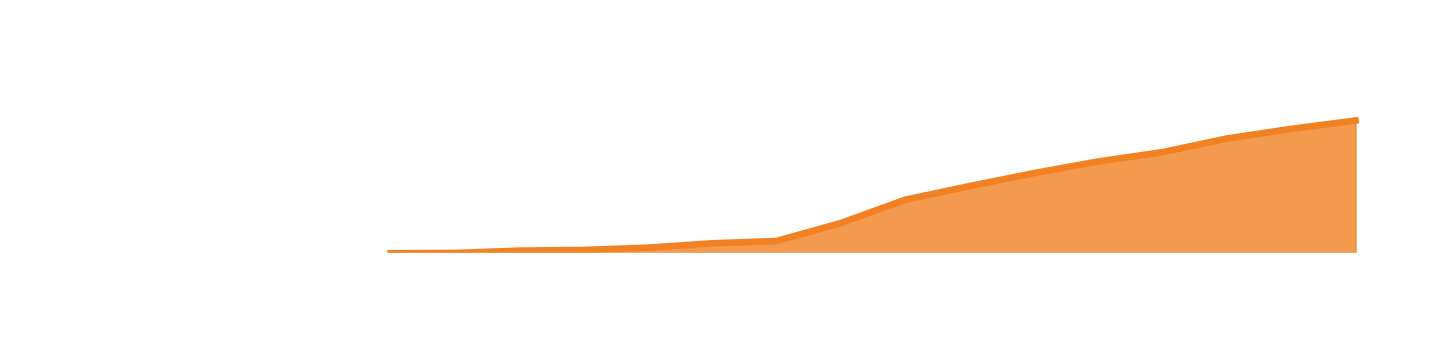

In [64]:
plt.figure(figsize=(12, 3), dpi=120)
ax = plt.gca()
sns.lineplot(data = df_months_spa, x = 'Leo_months', y = 'word', color = '#F28123', linewidth = 4)
#sns.scatterplot(data = df_months, x = 'Leo_months', y = 'word', color = '#82A0BC', s = 100)

#plt.title(r"Vocabulary increase", size = 28, color = 'white', loc = 'left')
#ax.set_title(r"Total vocabulary increase", size = 28, color = 'white', loc = 'left', y=1.2, pad=-14)
plt.xlabel(r"Kid's months", size = 18)
plt.ylabel('# of Spanish words',rotation=0, size = 18)
plt.xlim([9,27])
plt.ylim([0,600])
ax.yaxis.set_label_coords(-0.09,1.07)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.tick_params(axis='x', colors='white', width=2)
ax.tick_params(axis='y', colors='white', width=2)
#plt.hlines(50, 0, 15.5, linestyle='--', color = 'white')
#plt.hlines(100, 0, 17, linestyle='--', color = 'white')
plt.fill_between(df_months_spa.Leo_months.values, df_months_spa.word.values, color = '#F28123', alpha = 0.8)
sns.despine()
plt.tight_layout()
plt.savefig('words_filled_wide_spa.png', transparent=True)

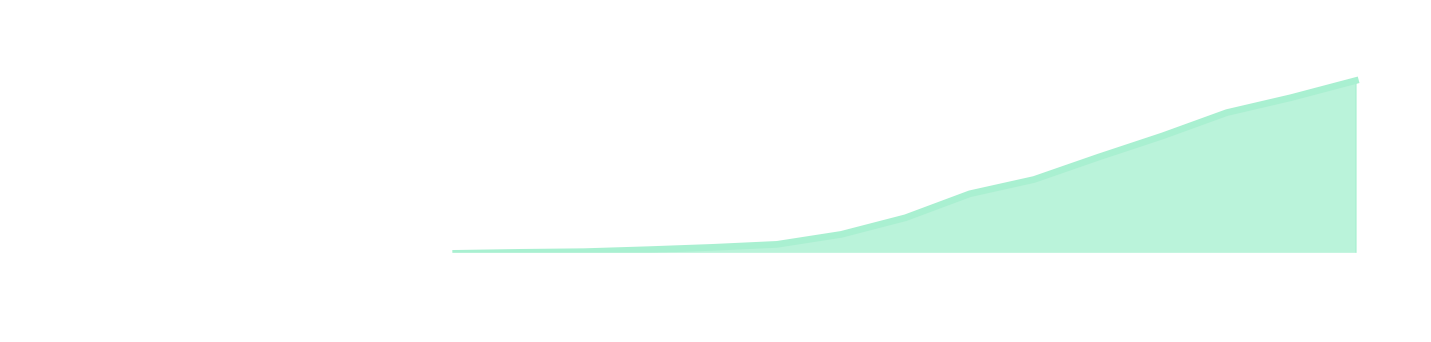

In [65]:
plt.figure(figsize=(12, 3), dpi=120)
ax = plt.gca()
sns.lineplot(data = df_months_ger, x = 'Leo_months', y = 'word', color = '#A9F0D1', linewidth = 4)
#sns.scatterplot(data = df_months, x = 'Leo_months', y = 'word', color = '#82A0BC', s = 100)

#plt.title(r"Vocabulary increase", size = 28, color = 'white', loc = 'left')
#ax.set_title(r"Total vocabulary increase", size = 28, color = 'white', loc = 'left', y=1.2, pad=-14)
plt.xlabel(r"Kid's months", size = 18)
plt.ylabel('# of German words',rotation=0, size = 18)
plt.xlim([9,27])
plt.ylim([0,600])
ax.yaxis.set_label_coords(-0.09,1.07)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.tick_params(axis='x', colors='white', width=2)
ax.tick_params(axis='y', colors='white', width=2)
#plt.hlines(50, 0, 15.5, linestyle='--', color = 'white')
#plt.hlines(100, 0, 17, linestyle='--', color = 'white')
plt.fill_between(df_months_ger.Leo_months.values, df_months_ger.word.values, color = '#A9F0D1', alpha = 0.8)
sns.despine()
plt.tight_layout()
plt.savefig('words_filled_wide_ger.png', transparent=True)

### Language distribution

In [66]:
df['word_no'] = np.arange(1,df.shape[0]+1)

In [67]:
languages = ['german', 'spanish', 'neutral']

In [68]:
df['language'] = [process.extractOne(word, languages)[0] for word in list(df['language'])]

In [69]:
df['word_no'] = np.arange(1,df.shape[0]+1)

<Figure size 864x216 with 0 Axes>

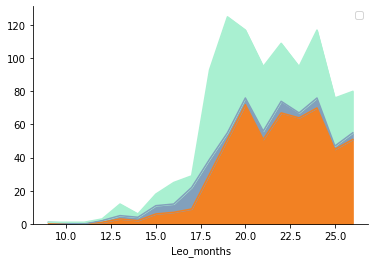

In [70]:
plt.figure(figsize = (12,3))
df.groupby(['Leo_months', 'language'])['word_no'].count().unstack().plot.area(color = ['#F28123','#82A0BC','#A9F0D1'])
plt.legend('')
sns.despine()

In [71]:
df[df['language'] == 'german'].groupby('Leo_months')['word_no'].count()

Leo_months
12     1
13     3
14     2
15     6
16     7
17     9
18    30
19    51
20    72
21    51
22    67
23    64
24    70
25    45
26    51
Name: word_no, dtype: int64

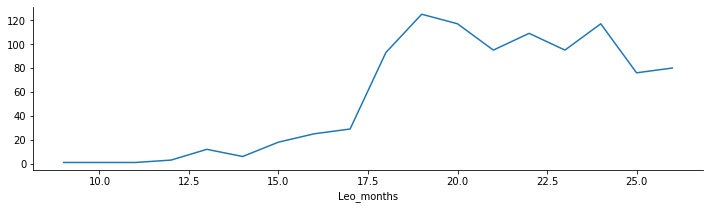

In [72]:
plt.figure(figsize = (12,3))
df.groupby('Leo_months')['word_no'].count().plot()
sns.despine()

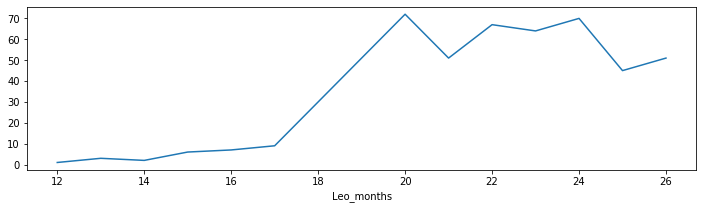

In [73]:
plt.figure(figsize = (12,3))
df[df['language'] == 'german'].groupby('Leo_months')['word_no'].count().plot()
#sns.despine()

In [74]:
df_new_spa_words = df[df['language'] == 'spanish'].groupby('Leo_months')['word_no'].count().to_frame().reset_index()
df_new_spa_words.head()

,Leo_months,word_no
0,11,1
1,12,1
2,13,7
3,14,2
4,15,7


In [75]:
df_new_ger_words = df[df['language'] == 'german'].groupby('Leo_months')['word_no'].count().to_frame().reset_index()
df_new_spa_words.head()
df_new_ger_words.head()

,Leo_months,word_no
0,12,1
1,13,3
2,14,2
3,15,6
4,16,7


#### `PLOT FOR TALK:` # of new words per language

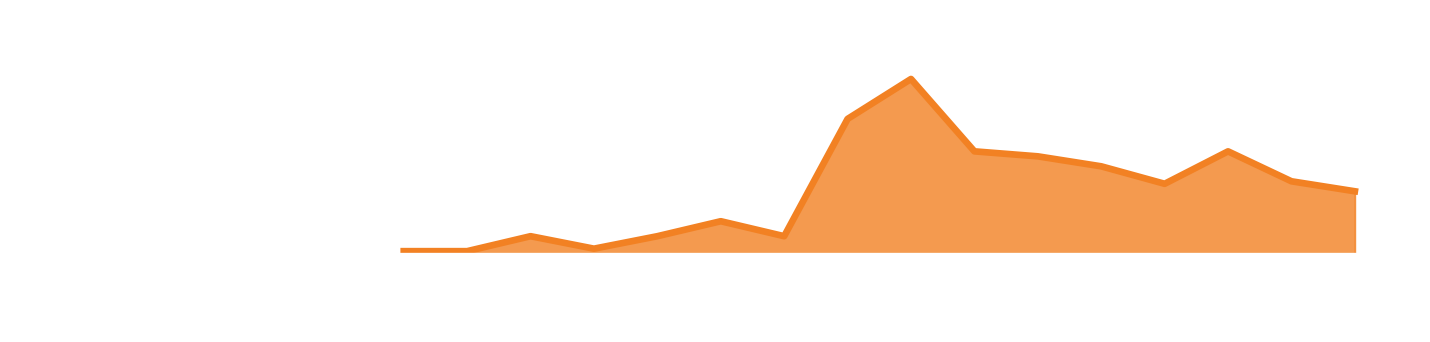

In [76]:
plt.figure(figsize=(12, 3), dpi=120)
ax = plt.gca()
sns.lineplot(data = df_new_spa_words, x = 'Leo_months', y = 'word_no', color = '#F28123', linewidth = 4)
#sns.scatterplot(data = df_months, x = 'Leo_months', y = 'word', color = '#82A0BC', s = 100)

#plt.title(r"Vocabulary increase", size = 28, color = 'white', loc = 'left')
#ax.set_title(r"Total vocabulary increase", size = 28, color = 'white', loc = 'left', y=1.2, pad=-14)
plt.xlabel(r"Kid's months", size = 18)
plt.ylabel('# new Spanish words',rotation=0, size = 18)
plt.xlim([9,27])
plt.ylim([0,80])
ax.yaxis.set_label_coords(-0.09,1.07)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.tick_params(axis='x', colors='white', width=2)
ax.tick_params(axis='y', colors='white', width=2)
#plt.hlines(50, 0, 15.5, linestyle='--', color = 'white')
#plt.hlines(100, 0, 17, linestyle='--', color = 'white')
plt.fill_between(df_new_spa_words.Leo_months.values, df_new_spa_words.word_no.values, color = '#F28123', alpha = 0.8)
sns.despine()
plt.tight_layout()
plt.savefig('words_filled_wide_spa.png', transparent=True)

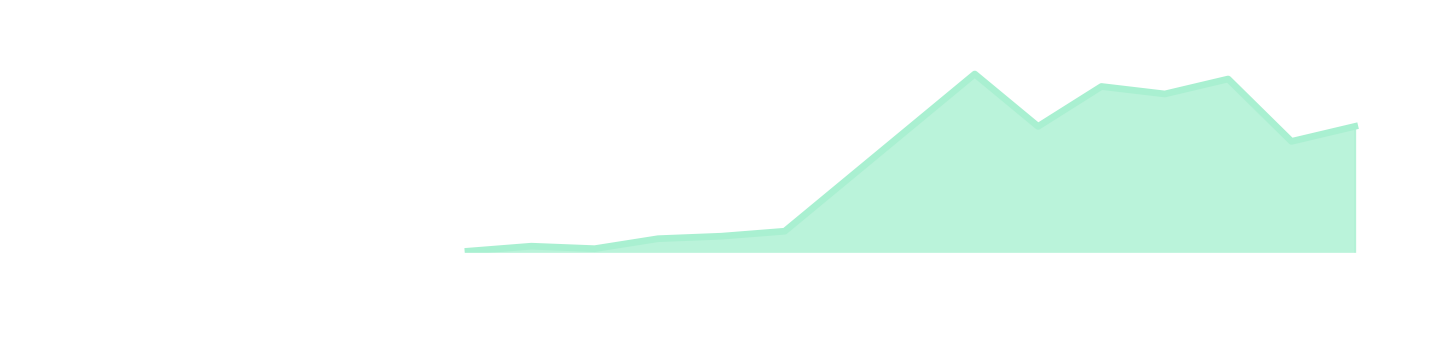

In [78]:
plt.figure(figsize=(12, 3), dpi=120)
ax = plt.gca()
sns.lineplot(data = df_new_ger_words, x = 'Leo_months', y = 'word_no', color = '#A9F0D1', linewidth = 4)
#sns.scatterplot(data = df_months, x = 'Leo_months', y = 'word', color = '#82A0BC', s = 100)

#plt.title(r"Vocabulary increase", size = 28, color = 'white', loc = 'left')
#ax.set_title(r"Total vocabulary increase", size = 28, color = 'white', loc = 'left', y=1.2, pad=-14)
plt.xlabel(r"Kid's months", size = 18)
plt.ylabel('# new German words',rotation=0, size = 18)
plt.xlim([9,27])
plt.ylim([0,80])
ax.yaxis.set_label_coords(-0.09,1.07)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.tick_params(axis='x', colors='white', width=2)
ax.tick_params(axis='y', colors='white', width=2)
#plt.hlines(50, 0, 15.5, linestyle='--', color = 'white')
#plt.hlines(100, 0, 17, linestyle='--', color = 'white')
plt.fill_between(df_new_ger_words.Leo_months.values, df_new_ger_words.word_no.values, color = '#A9F0D1', alpha = 0.8)
sns.despine()
plt.tight_layout()
plt.savefig('words_filled_wide_ger.png', transparent=True)

## Type of word analysis
Extract Universal POS 
Be sure to download language models first:
- `python -m spacy download es_core_news_sm`
- `python -m spacy download es_core_news_sm`

In [40]:
nlp_spa = spacy.load('es_core_news_sm')
nlp_ger = spacy.load('de_core_news_sm')

### test

In [34]:
doc = nlp_spa(df.word.iloc[46])

for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.is_oov)

gracias gracias NOUN NOUN True


In [41]:
def get_pos(word, language):
    pos = []
    if language == 'spanish':
        doc = nlp_spa(word)
    else:
        doc = nlp_ger(word)
    for token in doc:
        pos.append(token.pos_)
    return pos[0]

In [42]:
df['word type (pos)']  = df.apply(lambda x:get_pos(x['word'], x['language']), axis = 1)

In [43]:
df.rename(columns = {'word type (pos)':'word type (pos) new'}, inplace = True)

#### Merge with corrected `pos` data

In [46]:
pos_correct = pd.read_csv('../data/words_clean_pos.csv', index_col=0)

In [47]:
pos_correct.head()

,word,word type (pos)
0,Mama,PROPN
1,agua,NOUN
2,luna,NOUN
3,Banane,NOUN
4,Pepe,PROPN


In [48]:
df = df.drop_duplicates(subset = ['word']).merge(pos_correct, on = 'word')

In [49]:
df.drop('word type (pos) new', axis = 1, inplace = True)

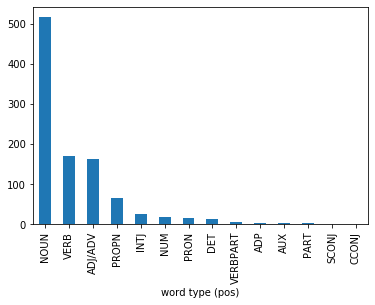

In [50]:
df.groupby('word type (pos)')['word'].count().sort_values(ascending = False).plot.bar()

In [51]:
df.loc[(df['word type (pos)'] == 'ADJ')| (df['word type (pos)'] == 'ADV'), 'word type (pos)'] = "ADJ/ADV"

In [52]:
list(df.groupby('word type (pos)')['word'].count().sort_values(ascending = False).to_frame().index)

['NOUN',
 'VERB',
 'ADJ/ADV',
 'PROPN',
 'INTJ',
 'NUM',
 'PRON',
 'DET',
 'VERBPART',
 'ADP',
 'AUX',
 'PART',
 'SCONJ',
 'CCONJ']

In [79]:
df[['word', 'language', 'word type (pos)']].drop_duplicates(subset = ['word']).head(11)

,word,language,word type (pos)
0,Mama,spanish,PROPN
1,agua,neutral,NOUN
2,luna,neutral,NOUN
3,Banane,neutral,NOUN
4,Pepe,spanish,PROPN
5,Ball,spanish,NOUN
6,más,spanish,ADJ/ADV
8,no,neutral,INTJ
9,Mami,spanish,PROPN
10,luz,german,NOUN


<Figure size 720x432 with 0 Axes>

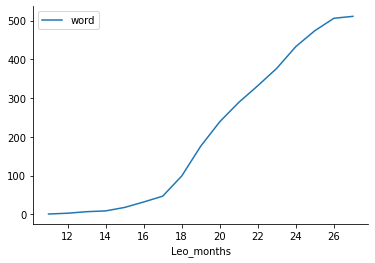

In [636]:
plt.figure(figsize = (10,6))
df.loc[df['word type (pos)'] == 'NOUN',:].groupby(['Leo_months'])['word'].count().cumsum().to_frame().plot()
sns.despine()

### Total words vs types of words

In [79]:
df_first_appearance = df.drop_duplicates(subset = ['word type (pos)'])
df_first_appearance

,word,language,month,Leo_months,word type (pos),word_no
0,Mama,neutral,2020-08,9,PROPN,1
1,agua,spanish,2020-09,11,NOUN,2
6,más,spanish,2020-11,13,ADJ/ADV,7
8,no,spanish,2020-11,13,INTJ,9
14,este,spanish,2020-12,13,DET,15
25,zu,german,2021-01,15,VERBPART,26
57,te,spanish,2021-03,16,PRON,58
61,tres,spanish,2021-03,16,NUM,62
97,essen,german,2021-04,18,VERB,98
366,hay,spanish,2021-07,20,AUX,367


In [80]:
df_first_appearance.loc[df_first_appearance['word type (pos)'] == 'PROPN','word_no']

0    1
Name: word_no, dtype: int64

In [81]:
df_first_appearance.loc[df_first_appearance['word type (pos)'] == 'PROPN',:]

,word,language,month,Leo_months,word type (pos),word_no
0,Mama,neutral,2020-08,9,PROPN,1


In [82]:
df_first_appearance.head()

,word,language,month,Leo_months,word type (pos),word_no
0,Mama,neutral,2020-08,9,PROPN,1
1,agua,spanish,2020-09,11,NOUN,2
6,más,spanish,2020-11,13,ADJ/ADV,7
8,no,spanish,2020-11,13,INTJ,9
14,este,spanish,2020-12,13,DET,15


In [1026]:
def plot_pos_type(pos_type, y_shift_text,y_shift):
    df_sub = df_first_appearance.loc[df_first_appearance['word type (pos)'] == pos_type,:]
    sns.scatterplot(data = df_sub, x = 'Leo_months', color = '#82A0BC', s = 100)
    plt.text(x = df_sub['Leo_months'].values[0]-0.5, y = df_sub['word_no'].values[0]+y_shift_text, s = df_sub['word type (pos)'].values[0], color = 'white')
    #print( df_sub['word type (pos)'].values[0])

#### `PLOT FOR TALK:` # first appearance new types of words

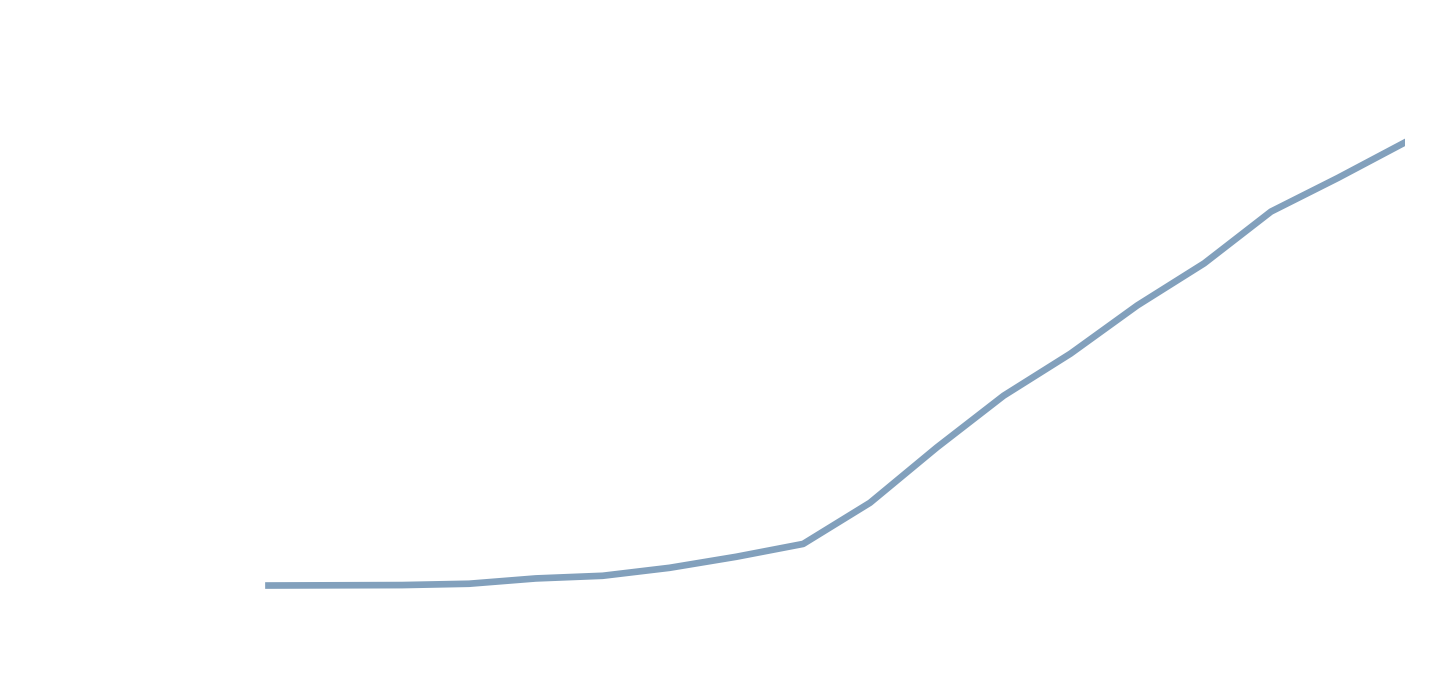

In [1028]:
plt.figure(figsize=(12, 6), dpi=120)
ax = plt.gca()
sns.lineplot(data = df_months, x = 'Leo_months', y = 'word', color = '#82A0BC', linewidth = 4)
# plot_pos_type('PROPN', 40,0)
# plot_pos_type('NOUN', 40,0)
# plot_pos_type('ADJ/ADV', 40,0)
# plot_pos_type('INTJ', 80,0)
# plot_pos_type('DET', 120, 0) 
# plot_pos_type('VERBPART', 60, 10) 
plot_pos_type('PRON', 80, 40)
# plot_pos_type('NUM', 120, 40)
# plot_pos_type('ADP', 80, 40)
# plot_pos_type('AUX', 80, 40)
# plot_pos_type('PART', 80,40)
# plot_pos_type('CCONJ', 80,40)
# plot_pos_type('SCONJ', 80,40)

#sns.scatterplot(data = df_first_appearance.loc[df_first_appearance['word type (pos)'] == 'PROPN',:], x = 'Leo_months', y = 'word_no', color = '#82A0BC', s = 100)
#plt.text(x = df_first_appearance.loc[df_first_appearance['word type (pos)'] == 'PROPN','Leo_months'], y = df_first_appearance.loc[df_first_appearance['word type (pos)'] == 'PROPN','word_no']+3, s = df_first_appearance.loc[df_first_appearance['word type (pos)'] == 'PROPN','word type (pos)'])
ax.set_title(r"First appearance of new types of words", size = 28, color = 'white', loc = 'left', y=1.2, pad=-14)
plt.ylabel('# of words',rotation=0, size = 18)
plt.xlabel(r"Kid's months", size = 18)
plt.xlim([8,26])
ax.yaxis.set_label_coords(-0.09,1.02)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.tick_params(axis='x', colors='white', width=2)
ax.tick_params(axis='y', colors='white', width=2)
#plt.hlines(50, 0, 15.5, linestyle='--', color = 'white')
#plt.hlines(100, 0, 17, linestyle='--', color = 'white')
#plt.fill_between(df.Date.values, df.Data.values)
sns.despine()
plt.tight_layout()
plt.savefig('words_for_types.png', transparent=True)

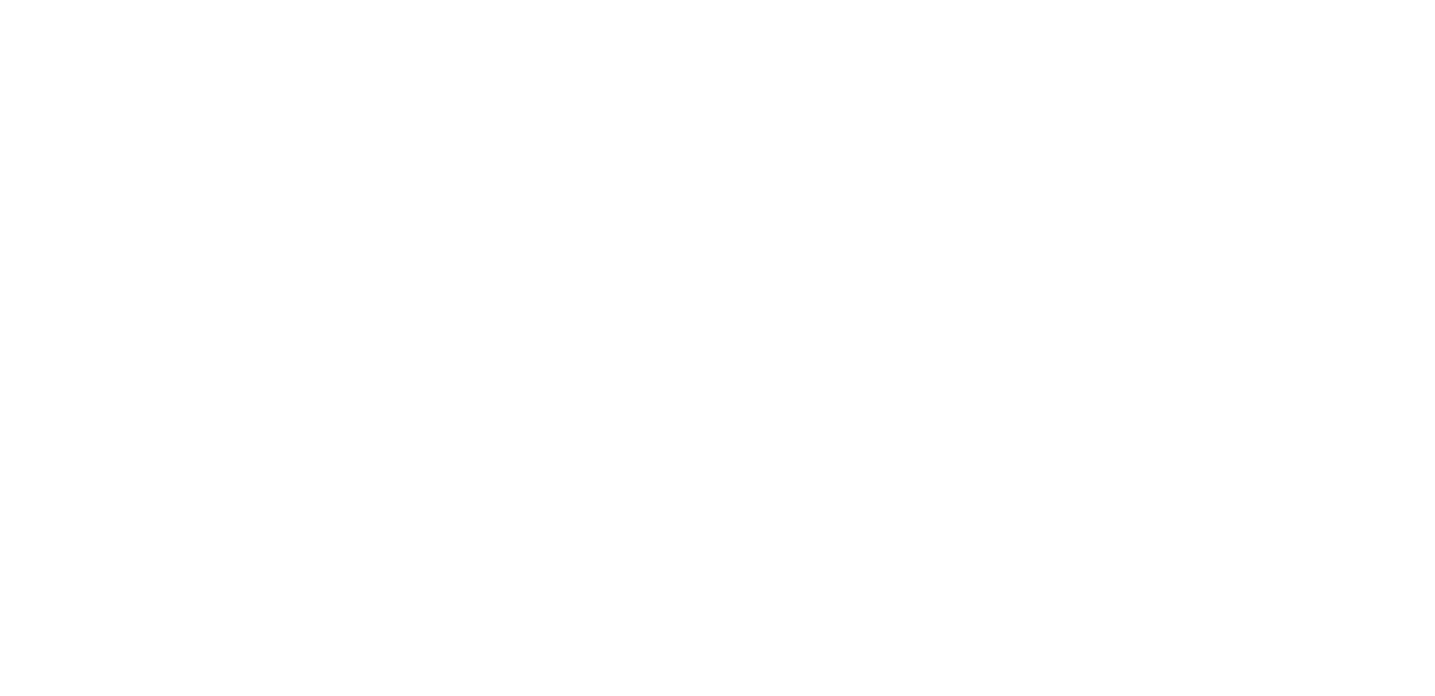

In [55]:
plt.figure(figsize=(12, 6), dpi=120)
ax = plt.gca()
#sns.scatterplot(data = df_first_appearance.loc[df_first_appearance['word type (pos)'] == 'PROPN',:], x = 'Leo_months', y = 'word_no', color = '#82A0BC', s = 100)
#plt.text(x = df_first_appearance.loc[df_first_appearance['word type (pos)'] == 'PROPN','Leo_months'], y = df_first_appearance.loc[df_first_appearance['word type (pos)'] == 'PROPN','word_no']+3, s = df_first_appearance.loc[df_first_appearance['word type (pos)'] == 'PROPN','word type (pos)'])
ax.set_title(r"First appearance of new types of words", size = 28, color = 'white', loc = 'left', y=1.2, pad=-14)
plt.ylabel('# of words',rotation=0, size = 18)
plt.xlabel(r"Kid's months", size = 18)
plt.xlim([8,26])
ax.yaxis.set_label_coords(-0.09,1.02)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.tick_params(axis='x', colors='white', width=2)
ax.tick_params(axis='y', colors='white', width=2)
#plt.hlines(50, 0, 15.5, linestyle='--', color = 'white')
#plt.hlines(100, 0, 17, linestyle='--', color = 'white')
#plt.fill_between(df.Date.values, df.Data.values)
sns.despine()
plt.tight_layout()
plt.savefig('words_for_types.png', transparent=True)

In [84]:
pos_by_month = df.groupby(['Leo_months', 'word type (pos)'])['word_no'].count().unstack().T.reindex(list(df.groupby('word type (pos)')['word'].count().sort_values(ascending = False).to_frame().index))

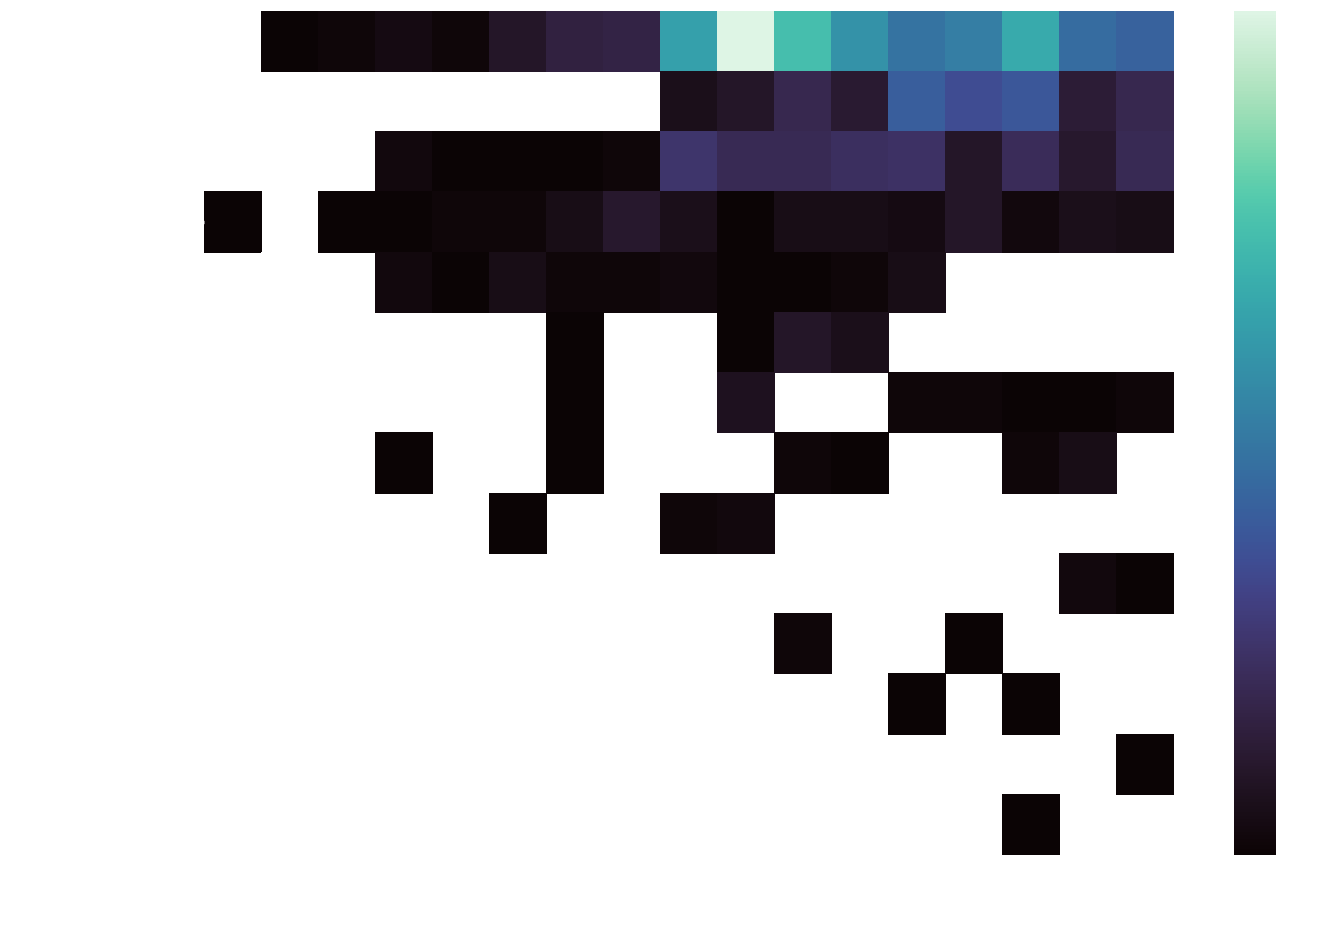

In [85]:
plt.figure(figsize=(12, 8), dpi=120)
ax = plt.gca()
sns.heatmap(pos_by_month , cmap = 'mako')
#ax.set_title(r"New words by type", size = 28, color = 'white', loc = 'left', y= 2, pad=-14)
plt.ylabel(' ')
plt.xlabel(r"Kid's months", size = 20)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.tick_params(axis='x', colors='white', width=2)
ax.tick_params(axis='y', colors='white', width=2)
cbar = ax.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=18, color = 'white', labelcolor = 'white')
#cbar.ax.yaxis.label.set_color('white')
plt.tight_layout()
plt.savefig('new_words_type.png', transparent=True)

In [1046]:
df[['word', 'word type (pos)']].to_csv('words_clean_pos.csv')